# Factor analysis
Factor analysis is a linear statistical model. 

It is used to explain the variance among the observed variable and condense a set of the observed variable into the unobserved variable called factors

## Compare to PCA

* PCA is focused on the variance of the observed variable, while FA is focused on the covariance of the observed variable
* PCA's components are orthogonal, while FA's components are not orthogonal
* PCA is a combination of the observed variable, while FA is a combination of the unobserved variable or factor

In [23]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

df= pd.read_csv("./data/bfi.csv")
print(df.shape)
df.head()

(2800, 29)


,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [24]:
df.drop(['gender', 'education', 'age', 'Unnamed: 0'],axis=1,inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 2799
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      2436 non-null   float64
 1   A2      2436 non-null   float64
 2   A3      2436 non-null   float64
 3   A4      2436 non-null   float64
 4   A5      2436 non-null   float64
 5   C1      2436 non-null   float64
 6   C2      2436 non-null   float64
 7   C3      2436 non-null   float64
 8   C4      2436 non-null   float64
 9   C5      2436 non-null   float64
 10  E1      2436 non-null   float64
 11  E2      2436 non-null   float64
 12  E3      2436 non-null   float64
 13  E4      2436 non-null   float64
 14  E5      2436 non-null   float64
 15  N1      2436 non-null   float64
 16  N2      2436 non-null   float64
 17  N3      2436 non-null   float64
 18  N4      2436 non-null   float64
 19  N5      2436 non-null   float64
 20  O1      2436 non-null   float64
 21  O2      2436 non-null   int64  
 22  

<AxesSubplot: >

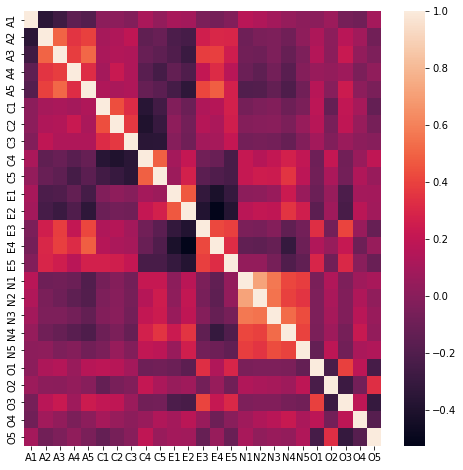

In [33]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(df.corr())

# PCA & factor analysis

In [46]:
# PCA
pca = PCA(n_components=3)
pca.fit(df)
print("explained variance ratio", pca.explained_variance_ratio_)
print("singular values", pca.singular_values_)
print("components", pca.components_)
print("total variance", pca.explained_variance_ratio_.sum())

explained variance ratio [0.21564969 0.11961961 0.08205116]
singular values [162.42808189 120.97284481 100.19108248]
components [[ 0.09751462 -0.14393626 -0.186193   -0.1904565  -0.21072113 -0.11572195
  -0.11313197 -0.11945455  0.20488688  0.27627832  0.21665513  0.3246385
  -0.19754701 -0.26586987 -0.19508025  0.26254009  0.25127777  0.26213449
   0.3093913   0.23241882 -0.09681692  0.10542961 -0.12626937  0.05084244
   0.07759554]
 [ 0.03173791 -0.17945077 -0.21664948 -0.14965836 -0.15710091 -0.08557445
  -0.12875026 -0.05522978 -0.01851269 -0.03772079  0.2542781   0.15651209
  -0.24734431 -0.21748469 -0.22374223 -0.37943158 -0.35751687 -0.3869892
  -0.20398586 -0.29530235 -0.09558984 -0.06502322 -0.15534778 -0.09073902
   0.01654048]
 [ 0.060388   -0.03978754 -0.08380085 -0.01892912 -0.11737162  0.31485701
   0.37500713  0.29812151 -0.3655035  -0.34561488  0.30459008  0.21600891
  -0.06112609 -0.23283878  0.08281944  0.05508071  0.09072468  0.07930872
   0.09979694  0.03318921  0.1

In [44]:
# factor analysis
fa = FactorAnalysis(n_components=3)
fa.fit(df)

# explained variance
m = fa.components_
n = fa.noise_variance_
m1 = m**2
m2 = np.sum(m1,axis=1)
pvar1 = (m2[0])/np.sum(m2)
pvar2 = (m2[1])/np.sum(m2)
pvar3 = (m2[2])/np.sum(m2)
pvar1_with_noise = (m2[0])/(np.sum(m2)+np.sum(n))
pvar2_with_noise = (m2[1])/(np.sum(m2)+np.sum(n))
pvar3_with_noise = (m2[2])/(np.sum(m2)+np.sum(n))
print("pvar without noise:",pvar1,pvar2,pvar3)
print("pvar with noise:",pvar1_with_noise,pvar2_with_noise,pvar3_with_noise)
print("noise variance:",n)
print("total variance:",np.sum(m2)+np.sum(n))
print("component variance:",np.sum(m2))

pvar without noise: 0.5531937120586317 0.281492195081799 0.16531409285956927
pvar with noise: 0.18856855318595453 0.0959529633158365 0.05635103695552048
noise variance: [1.86231321 1.00437225 1.06152341 1.78024123 0.91749543 0.98809318
 0.99888716 1.19844799 0.99960078 1.67127174 1.9053502  1.50118335
 1.08430302 1.09059617 1.15756809 0.8896145  0.88225889 1.17274269
 1.46831171 1.93091441 1.1086748  2.24416566 1.16606117 1.35440996
 1.66312727]
total variance: 50.220224391685164
component variance: 17.11869612359288


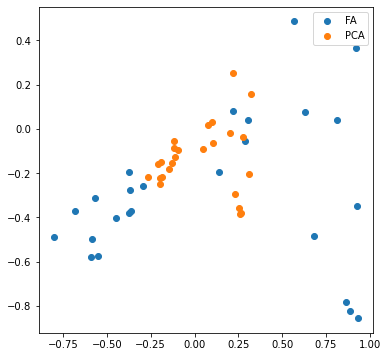

In [40]:
plt.figure(figsize=(6,6))
plt.scatter(fa.components_[0],fa.components_[1],label='FA')
plt.scatter(pca.components_[0],pca.components_[1],label='PCA')
plt.legend()

# why the fa and pca show different plot?

* FA is covariance based, PCA is variance based. 
* PCA is a linear transformation of the data, while FA is a linear transformation of the data and the latent variables.